Підключення основних бібліотек та файлу з даними

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import iplot

data = pd.read_csv('customer_shopping_data.csv')

Первинна перевірка датасету

In [2]:
# Перегляд перших 10 рядків датасету
data.head(10)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon
5,I227836,C657758,Female,28,Clothing,5,1500.40,Credit Card,24/05/2022,Forum Istanbul
6,I121056,C151197,Female,49,Cosmetics,1,40.66,Cash,13/03/2022,Istinye Park
7,I293112,C176086,Female,32,Clothing,2,600.16,Credit Card,13/01/2021,Mall of Istanbul
8,I293455,C159642,Male,69,Clothing,3,900.24,Credit Card,4/11/2021,Metrocity
9,I326945,C283361,Female,60,Clothing,2,600.16,Credit Card,22/08/2021,Kanyon


In [3]:
# Вивчення структури датасету
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [4]:
# Перевірка на наявність null-значень 
data.isnull().sum()

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

In [5]:
# Перевірка на наявність дублікатів
data.duplicated().sum()

0

Проведення необхідних змін для подальшого аналізу

In [7]:
# Перетворення колонки "invoice_date" у формат datetime64
data['invoice_date'] = pd.to_datetime(data['invoice_date'], dayfirst=True)

# Додавання стовпця "price_usd" який показує ціну у доларах замість турецьких лір
data['price_usd'] = round(data['price'] / 30, 2)

# Додавання стовпця "total_revenue" 
data['total_revenue'] = round(data['quantity'] * data['price_usd'], 2)

In [8]:
# Огляд таблиці після перетворень
data.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,price_usd,total_revenue
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,50.01,250.05
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,60.02,180.06
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,10.00,10.00
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,100.03,500.15
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,2.02,8.08


In [9]:
# Повторний огляд структури датасету після проведених перетворень
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   invoice_no      99457 non-null  object        
 1   customer_id     99457 non-null  object        
 2   gender          99457 non-null  object        
 3   age             99457 non-null  int64         
 4   category        99457 non-null  object        
 5   quantity        99457 non-null  int64         
 6   price           99457 non-null  float64       
 7   payment_method  99457 non-null  object        
 8   invoice_date    99457 non-null  datetime64[ns]
 9   shopping_mall   99457 non-null  object        
 10  price_usd       99457 non-null  float64       
 11  total_revenue   99457 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(6)
memory usage: 9.1+ MB


In [10]:
data.describe()

,age,quantity,price,invoice_date,price_usd,total_revenue
count,99457.000000,99457.000000,99457.000000,99457,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321,2022-02-04 02:46:59.783424,22.975059,84.291995
min,18.000000,1.000000,5.230000,2021-01-01 00:00:00,0.170000,0.170000
25%,30.000000,2.000000,45.450000,2021-07-19 00:00:00,1.520000,4.560000
50%,43.000000,3.000000,203.300000,2022-02-05 00:00:00,6.780000,20.010000
75%,56.000000,4.000000,1200.320000,2022-08-22 00:00:00,40.010000,90.030000
max,69.000000,5.000000,5250.000000,2023-03-08 00:00:00,175.000000,875.000000
std,14.990054,1.413025,941.184567,NaN,31.372892,140.748271


In [16]:
# Розрахунок основних статистичних показників
data.describe()

,age,quantity,price,invoice_date,price_usd,total_revenue,average_check
count,99457.000000,99457.000000,99457.000000,99457,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321,2022-02-04 02:46:59.783424,22.975059,84.291995,229.280048
min,18.000000,1.000000,5.230000,2021-01-01 00:00:00,0.170000,0.170000,5.230000
25%,30.000000,2.000000,45.450000,2021-07-19 00:00:00,1.520000,4.560000,35.840000
50%,43.000000,3.000000,203.300000,2022-02-05 00:00:00,6.780000,20.010000,40.660000
75%,56.000000,4.000000,1200.320000,2022-08-22 00:00:00,40.010000,90.030000,300.080000
max,69.000000,5.000000,5250.000000,2023-03-08 00:00:00,175.000000,875.000000,1050.000000
std,14.990054,1.413025,941.184567,NaN,31.372892,140.748271,266.047550


In [11]:
# Розрахунок середній значень віку, кількості та витрат клієнтів для категорій
data.groupby("category")[["age","quantity","price_usd"]].mean().round(2)

,age,quantity,price_usd
category,,,
Books,43.54,3.01,1.52
Clothing,43.41,3.00,30.04
Cosmetics,43.58,3.01,4.08
Food & Beverage,43.35,3.00,0.52
Shoes,43.45,3.01,60.25
Souvenir,43.39,2.97,1.16
Technology,43.37,3.01,105.23
Toys,43.33,3.01,3.59


In [12]:
data.groupby('category')['price_usd'].agg(['mean','sum']).sort_values(by='mean',ascending=False)

,mean,sum
category,,
Technology,105.231185,525735.00
Shoes,60.247251,604520.92
Clothing,30.036143,1035856.46
Cosmetics,4.083635,61650.64
Toys,3.589108,36203.33
Books,1.517936,7560.84
Souvenir,1.160170,5799.69
Food & Beverage,0.521356,7703.56


Побудова графіків

  customer_id  average_purchase_value  total_quantity  total_purchase_value
0     C100004                   50.01               5                250.05
1     C100005                   40.01               2                 80.02
2     C100006                    3.58               3                 10.74
3     C100012                    0.87               5                  4.35
4     C100019                    1.19               1                  1.19


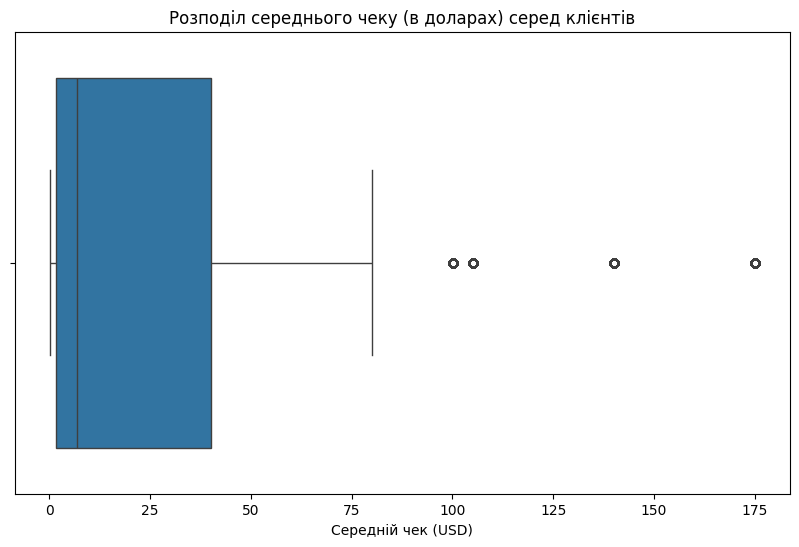

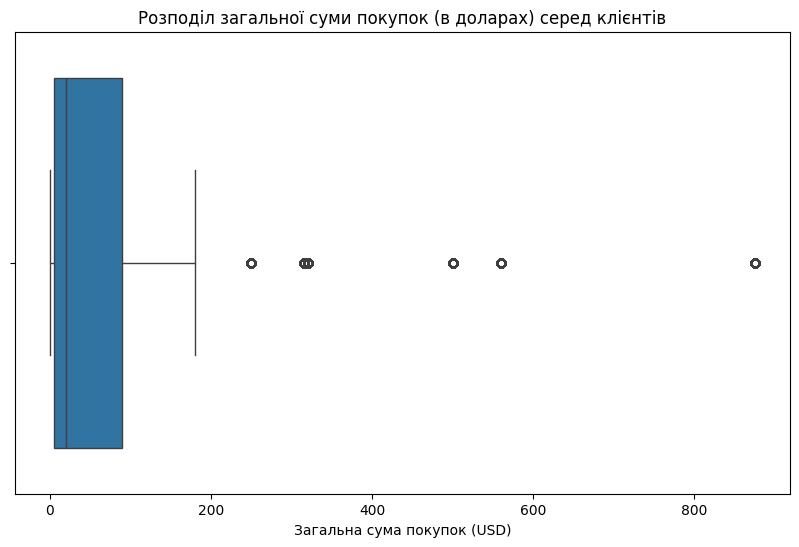

In [13]:
# Групування даних за customer_id
customer_group = data.groupby('customer_id').agg({
    'price_usd': 'mean',             # Середній чек у доларах
    'quantity': 'sum'                # Загальна кількість куплених товарів
}).reset_index()

# Перейменування колонок
customer_group.columns = ['customer_id', 'average_purchase_value', 'total_quantity']

# Обчислення загальної суми покупок для кожного клієнта в доларах
customer_group['total_purchase_value'] = customer_group['average_purchase_value'] * customer_group['total_quantity']

# Виведення перших рядків для перевірки
print(customer_group.head())

# Боксплот за середнім чеком у доларах
plt.figure(figsize=(10, 6))
sns.boxplot(x=customer_group['average_purchase_value'])
plt.title('Розподіл середнього чеку (в доларах) серед клієнтів')
plt.xlabel('Середній чек (USD)')
plt.show()

# Боксплот за загальною сумою покупок у доларах
plt.figure(figsize=(10, 6))
sns.boxplot(x=customer_group['total_purchase_value'])
plt.title('Розподіл загальної суми покупок (в доларах) серед клієнтів')
plt.xlabel('Загальна сума покупок (USD)')
plt.show()

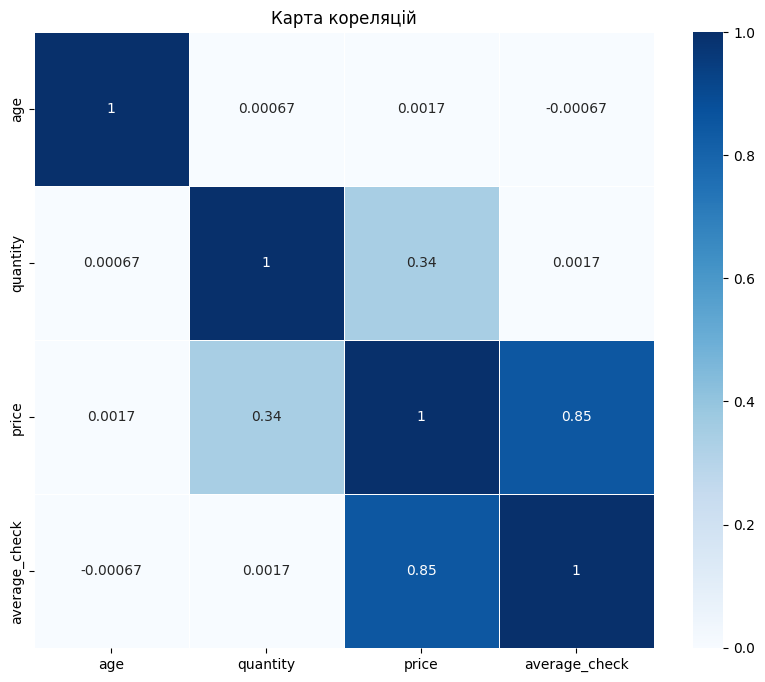

In [14]:
# Розрахунок середнього чеку
data['average_check'] = data['price'] / data['quantity']

# Створємо масив з даними для побудови кореляційної мапи
correlation_data = data[['age', 'quantity', 'price', 'average_check']]

# Розрахунок кореляції
correlation_matrix = correlation_data.corr()

# Побудова теплової кореляційної мапи
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', linewidths=0.5)
plt.title('Карта кореляцій')

plt.show()

Розрахунок основних метрик

In [15]:
# Загальна кількість продажів
total_sales_quantity = data['quantity'].sum()

# Загальний дохід (в доларах)
total_revenue_dollars = data['total_revenue'].sum()

# Середній чек (в доларах)
average_check_dollars = (data['total_revenue'].sum() / data.shape[0])

# Найпопулярніша категорія за сумою продажів (в доларах)
popular_category = data.groupby('category')['total_revenue'].sum().idxmax()
popular_category_revenue = data.groupby('category')['total_revenue'].sum().max()

# Найменш популярна категорія за сумою продажів (в доларах)
unpopular_category = data.groupby('category')['total_revenue'].sum().idxmin()
unpopular_category_revenue = data.groupby('category')['total_revenue'].sum().min()

# Найпопулярніший торговий центр за сумою продажів (в доларах)
popular_mall = data.groupby('shopping_mall')['total_revenue'].sum().idxmax()
popular_mall_revenue = data.groupby('shopping_mall')['total_revenue'].sum().max()

# Найбільша аудиторія (жінки чи чоловіки)
gender_count = data['gender'].value_counts()
largest_audience_gender = gender_count.idxmax()
largest_audience_count = gender_count.max()

# Середній вік клієнтів, мінімальний вік, максимальний вік, медіана
average_age = data['age'].mean()
min_age = data['age'].min()
max_age = data['age'].max()
median_age = data['age'].median()

# Найпопулярніший спосіб оплати
popular_payment_method = data['payment_method'].value_counts().idxmax()
popular_payment_method_count = data['payment_method'].value_counts().max()
popular_payment_method_revenue = data[data['payment_method'] == popular_payment_method]['total_revenue'].sum() / 26

# Торговий центр з найбільшою кількістю покупців
most_customers_mall = data.groupby('shopping_mall')['customer_id'].nunique().idxmax()
most_customers_count = data.groupby('shopping_mall')['customer_id'].nunique().max()

# Торговий центр з найменшою кількістю покупців
least_customers_mall = data.groupby('shopping_mall')['customer_id'].nunique().idxmin()
least_customers_count = data.groupby('shopping_mall')['customer_id'].nunique().min()

# Середній дохід з одного покупця
average_revenue_per_customer = data['total_revenue'].sum() / data['customer_id'].nunique()

# Виведення результатів
print(f"Загальна кількість продажів: {total_sales_quantity} одиниці \n")
print(f"Загальний дохід (в доларах): {round(total_revenue_dollars, 0)}$ \n")
print(f"Середній чек (в доларах): {round(average_check_dollars, 2)}$ \n")
print(f"Найпопулярніша категорія за сумою продажів (в доларах): {popular_category} - {round(popular_category_revenue, 2)}$ \n")
print(f"Найменш популярна категорія за сумою продажів (в доларах): {unpopular_category} - {round(unpopular_category_revenue,2)}$ \n")
print(f"Найпопулярніший торговий центр за сумою продажів (в доларах): {popular_mall} - {round(popular_mall_revenue,2)}$ \n")
print(f"Найбільша аудиторія (жінки чи чоловіки): {largest_audience_gender} - {largest_audience_count} \n")
print(f"Середній вік клієнтів: {round(average_age, 2)} \n")
print(f"Мінімальний вік клієнтів: {min_age} \n")
print(f"Максимальний вік клієнтів: {max_age} \n")
print(f"Медіана віку клієнтів: {median_age} \n")
print(f"Найпопулярніший спосіб оплати: {popular_payment_method} - {popular_payment_method_count} покупок, {round(popular_payment_method_revenue, 2)}$ \n")
print(f"Торговий центр з найбільшою кількістю покупців: {most_customers_mall} - {most_customers_count} \n")
print(f"Торговий центр з найменшою кількістю покупців: {least_customers_mall} - {least_customers_count}")


Загальна кількість продажів: 298712 одиниці 

Загальний дохід (в доларах): 8383429.0$ 

Середній чек (в доларах): 84.29$ 

Найпопулярніша категорія за сумою продажів (в доларах): Clothing - 3799847.17$ 

Найменш популярна категорія за сумою продажів (в доларах): Souvenir - 21139.95$ 

Найпопулярніший торговий центр за сумою продажів (в доларах): Mall of Istanbul - 1695730.8$ 

Найбільша аудиторія (жінки чи чоловіки): Female - 59482 

Середній вік клієнтів: 43.43 

Мінімальний вік клієнтів: 18 

Максимальний вік клієнтів: 69 

Медіана віку клієнтів: 43.0 

Найпопулярніший спосіб оплати: Cash - 44447 покупок, 144655.01$ 

Торговий центр з найбільшою кількістю покупців: Mall of Istanbul - 19943 

Торговий центр з найменшою кількістю покупців: Emaar Square Mall - 4811
